In [31]:
rawData = open("./data/EVV Weather Obs.txt").readlines()
cleanData = []

* Loops through range length of rawData as i.
* If i is greater than 1 then we know it isn't the header or the stylization.
* Removes any \n and splits for any spaces.
* While loop until all empty strings in list are gone.
* Deletes extra data (index 0 to 6).
* Adds the tempData to the cleanData list for later sorting.

In [32]:
for i in range(len(rawData)):
    if i > 1:
        tempData = rawData[i].replace("\n","").split(" ")
        while "" in tempData:
            tempData.remove("")
        del tempData[0:6]
        year = int(tempData[0][:4])
        month = int(tempData[0][4:6])
        day = int(tempData[0][6:8])
        del tempData[0]
        tempData.insert(0,day)
        tempData.insert(0,month)
        tempData.insert(0,year)
        for i in range(len(tempData)):
            if tempData[i] == "-9999":
                tempData[i]=0
            else:
                tempData[i]=float(tempData[i])
        cleanData.append(tempData)
#clean up
del tempData, rawData, year, month, day, i

1st if: Checks if TAVG has any valid data and prints it.
2nd if: Checks if TOBS has any valid data and prints it.

Both contain data, nothing needs to be deleted. (TOBS only has 0 in it)

In [33]:
#for i in cleanData:
#    if i[10] != "-9999":
#        print(i[10])
#    if i[13] != "-9999":
#        print(i[13])

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['figure.figsize'] = [15, 7]

df = pd.DataFrame(cleanData, columns=["YEAR","MONTH","DAY","PRCP","SNWD","SNOW","TAVG","TMAX","TMIN","TOBS"])

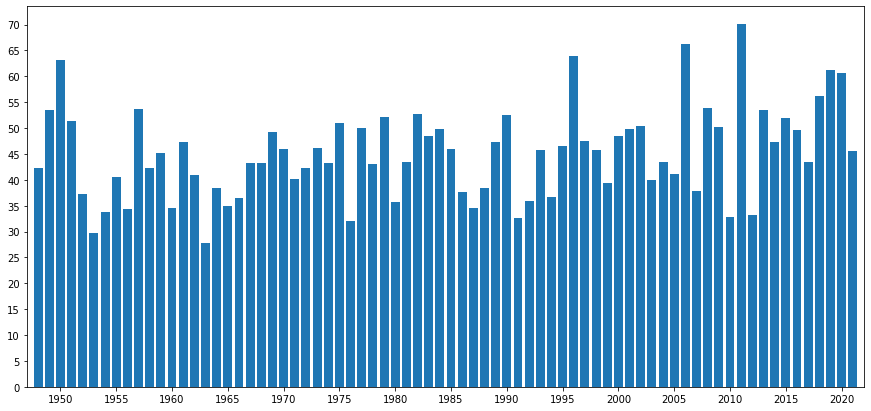

In [35]:
uniqYears = df.YEAR.unique()
years, sums = [],[]
for year in uniqYears:
    prcp = df[df["YEAR"]==year]["PRCP"]
    ssum = prcp.sum()
    years.append(year)
    sums.append(ssum)
plt.bar(years,sums)
plt.xlim([years[0]-1, years[-1]+1])
plt.locator_params(nbins = 20)
plt.show()

C:\Users\younglings\AppData\Local\Temp\ipykernel_12940\3459726210.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  prcp = df[df["YEAR"]==year][df["MONTH"] == 1]["PRCP"]


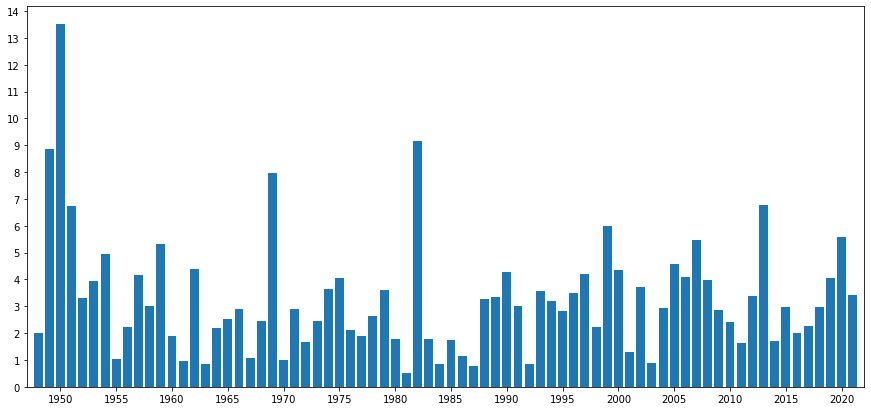

In [36]:
years, sums = [],[]
for year in uniqYears:
    prcp = df[df["YEAR"]==year][df["MONTH"] == 1]["PRCP"]
    ssum = prcp.sum()
    years.append(year)
    sums.append(ssum)
plt.bar(years,sums)
plt.xlim([years[0]-1, years[-1]+1])
plt.locator_params(nbins = 20)
plt.show()

del uniqYears, years, sums, year, prcp, ssum

In [37]:
amount = 0
tempSnow = 0
daysWithSNWD = 0
for i in cleanData:
    if i[3] > 0 and i[5] > 0:
        amount+=1
    if i[4] > 0:
        tempSnow+=1
    else:
        if tempSnow > daysWithSNWD:
            daysWithSNWD=tempSnow
        tempSnow=0
print(f"Rained and snowed on {amount} days.")
print(f"Longest stretch with snow on ground: {daysWithSNWD} days")
del i, amount,daysWithSNWD,tempSnow

Rained and snowed on 764 days.
Longest stretch with snow on ground: 53 days


In [38]:
averageTemperature = []
for i in range(len(cleanData)):
    if cleanData[i][6] != 0:
        try:
            averageTemperature.append(abs(cleanData[i][6]-cleanData[i+1][6]))
        except:
            pass
print(f"Average temperature change between each day: {round(sum(averageTemperature)/len(averageTemperature),2)}°")
del averageTemperature,i

Average temperature change between each day: 4.7°


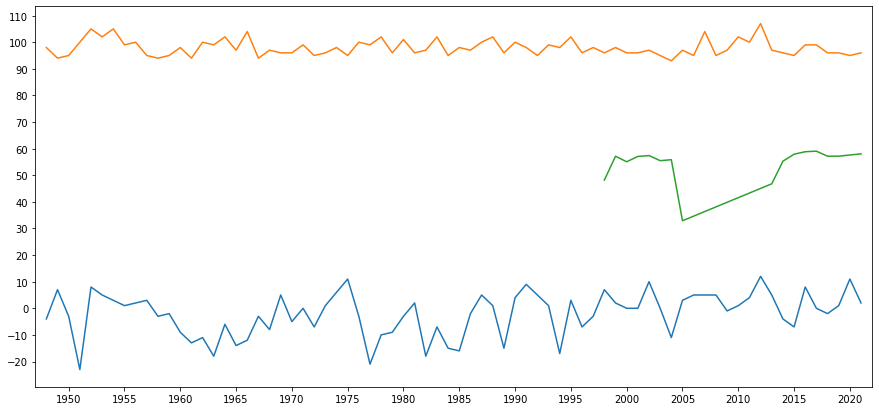

In [39]:
uniqYears = df.YEAR.unique()
years, avg, min, max = [], [], [], []
for year in uniqYears:
    prcp = df[df["YEAR"]==year]["TAVG"]
    prcpmi = df[df["YEAR"]==year]["TMIN"]
    prcpma = df[df["YEAR"]==year]["TMAX"]
    avgV = prcp.mean()
    minV = prcpmi.min()
    maxV = prcpma.max()
    years.append(year)
    avg.append(avgV)
    min.append(minV)
    max.append(maxV)
plt.plot(years,min)
plt.plot(years,max)
plt.xlim([years[0]-1, years[-1]+1])
while 0 in avg:
    index = avg.index(0)
    del avg[index]
    del years[index]
plt.plot(years,avg)
plt.locator_params(nbins = 20)
plt.show()
del uniqYears, years, avg, min, max, prcp, prcpma, prcpmi, index, maxV, minV, avgV, year

In [40]:
difference = 0
date = []
for i in cleanData:
    amount = abs(i[7]-i[8])
    if difference < amount:
        difference = amount
        date = [i[0],i[1],i[2]]
print(f"Largest gap of {int(difference)}° between min and max on {int(date[1])}/{int(date[2])}/{int(date[0])}")

del difference, date, i, amount

Largest gap of 72° between min and max on 6/16/2018
